In [174]:
# Install required libraries
!pip install emoji --upgrade --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [175]:
# Import libraries
import pandas as pd
import re
import emoji
from collections import Counter

# Importing Data and Data Preprocessing

In [396]:
# read text from file 
file_location = r"C:\Users\Dell\Documents\ds_ai_whatsapp\_chat.txt"
with open(file_location, 'r', encoding='utf-8') as f:
    data = f.read()

In [397]:
# Create lists to store data
date_list = []
time_list = []
user_list = []
message_list = []

# Iterate through each line in the chat file
for line in data.split('\n'):
    # Use regular expressions to extract date, time, user/number, and message
    match = re.match(r'\[(.*?)\] (.*?):\s*(.*)', line)
    if match:
        date_time = match.group(1).split(', ')
        date_list.append(date_time[0])
        time_list.append(date_time[1])
        user_list.append(match.group(2))
        message_list.append(match.group(3))

In [398]:
# Create a pandas DataFrame from the extracted data
data = {
    'Date': date_list,
    'Time': time_list,
    'User': user_list,
    'Message': message_list
}
df = pd.DataFrame(data)

# Print the resulting DataFrame
df.head()

,Date,Time,User,Message
0,3/18/22,14:29:05,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...
1,3/18/22,14:29:05,~ chris,‎~ chris created this group
2,3/18/22,14:29:05,Ds & Ai,‎You were added
3,9/18/22,22:43:29,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...
4,9/20/22,06:31:52,~ chris,‎‎~ chris changed their phone number to a new ...


In [399]:
# # Slice the last 7 characters from the 'User' column to protect user privacy
# df['User'] = df['User'].str.slice(-7)

# Slice the first 3 characters from the 'User' column to protect user privacy
df['User'] = df['User'].str.slice(0, 4)

df.head()

,Date,Time,User,Message
0,3/18/22,14:29:05,Ds &,‎Messages and calls are end-to-end encrypted. ...
1,3/18/22,14:29:05,~ ch,‎~ chris created this group
2,3/18/22,14:29:05,Ds &,‎You were added
3,9/18/22,22:43:29,EMK,‎‎EMK Emmanuel changed their phone number to a...
4,9/20/22,06:31:52,~ ch,‎‎~ chris changed their phone number to a new ...


In [400]:
df.shape

(3930, 4)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3930 non-null   object
 1   Time     3930 non-null   object
 2   User     3930 non-null   object
 3   Message  3930 non-null   object
dtypes: object(4)
memory usage: 122.9+ KB


In [402]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14592\4210372300.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [403]:
# Convert 'Date' and 'Time' to string and merge them
df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time']

# Convert 'DateTime' back to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Now you can drop the 'Date' and 'Time' columns if you want
df = df.drop(['Date', 'Time'], axis=1)

df.head()

,User,Message,DateTime
0,Ds &,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05
1,~ ch,‎~ chris created this group,2022-03-18 14:29:05
2,Ds &,‎You were added,2022-03-18 14:29:05
3,EMK,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29
4,~ ch,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52


# SENTIMENT ANALYSIS

In [404]:
# Select relevant column for VADER sentiment analysis
reviews = df['Message']

In [405]:
from nltk.sentiment import SentimentIntensityAnalyzer
# using the VADER pre-trained sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define the get_sentiment_scores function
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

In [406]:
# apply the get_sentiment_scores function to each review
df['sentiment_scores'] = reviews.apply(get_sentiment_scores)

In [407]:
df.head()

,User,Message,DateTime,sentiment_scores
0,Ds &,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp..."
1,~ ch,‎~ chris created this group,2022-03-18 14:29:05,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
2,Ds &,‎You were added,2022-03-18 14:29:05,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,EMK,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
4,~ ch,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."


In [408]:
'''The negative, neutral, and positive scores represent the proportion of the text that falls into each category, 
while the compound score represents an aggregated score that ranges from -1 (most negative) to 1 (most positive) 
and reflects the overall sentiment of the text.'''

# create new columns for each sentiment score
df['vader_neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['vader_neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['vader_pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['vader_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# drop the original sentiment_scores column
df.drop('sentiment_scores', axis=1, inplace=True)

df.head()

,User,Message,DateTime,vader_neg,vader_neu,vader_pos,vader_compound
0,Ds &,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,0.099,0.901,0.000,-0.2960
1,~ ch,‎~ chris created this group,2022-03-18 14:29:05,0.000,0.667,0.333,0.2500
2,Ds &,‎You were added,2022-03-18 14:29:05,0.000,1.000,0.000,0.0000
3,EMK,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,0.000,0.782,0.218,0.2263
4,~ ch,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,0.000,0.782,0.218,0.2263


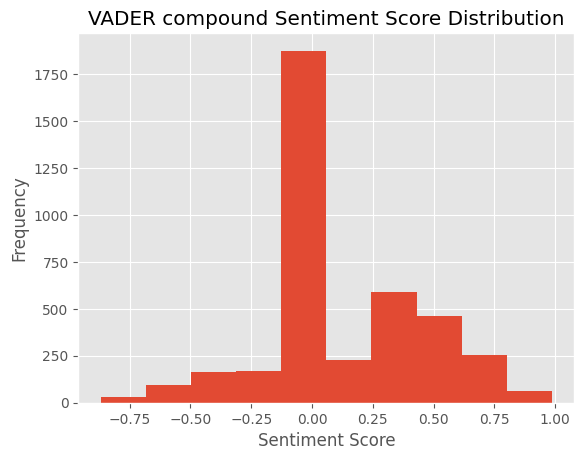

In [409]:
from matplotlib import pyplot as plt
# visual distribution of sentiment scores in a histogram
plt.hist(df["vader_compound"])
plt.title("VADER compound Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [410]:
# categorizing the sentiment as "negative", "neutral", or "positive" based on the value of the score
def map_sentiment(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'

df['vader_sentiment_category'] = df['vader_compound'].apply(map_sentiment)
df.head()

,User,Message,DateTime,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category
0,Ds &,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,0.099,0.901,0.000,-0.2960,negative
1,~ ch,‎~ chris created this group,2022-03-18 14:29:05,0.000,0.667,0.333,0.2500,positive
2,Ds &,‎You were added,2022-03-18 14:29:05,0.000,1.000,0.000,0.0000,neutral
3,EMK,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,0.000,0.782,0.218,0.2263,positive
4,~ ch,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,0.000,0.782,0.218,0.2263,positive


C:\Users\Dell\AppData\Local\Temp\ipykernel_14592\733312182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='vader_sentiment_category', kind='count', data=df, palette="muted")


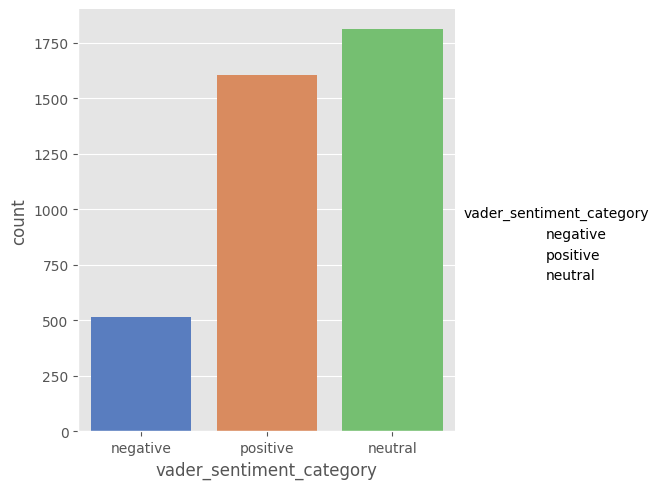

In [411]:
'''to get a clearer picture of the customer sentiment, they are grouped
according to their sentiment score. They are in 3 distinct groups of
positive, neutral and negative. The catplot below is a graphical
representation of the result.'''

import seaborn as sns
from seaborn import catplot
sns.catplot(x='vader_sentiment_category', kind='count', data=df, palette="muted")

In [421]:
import re

# Define a function to find the lecturer in the 'Message' column
def find_lecturer(message):
    lecturers = ['adnane', 'hisham', 'kakia']
    for lecturer in lecturers:
        if re.search(lecturer, message, re.IGNORECASE):
            return lecturer
    return None

# Create a new DataFrame that only contains the rows with the words 'adnane', 'hisham', or 'kakia' in the 'Message' column, regardless of case
df_lecturers = df[df['Message'].str.contains('adnane|hisham|kakia', case=False, na=False)]

# Select only the 'vader_compound' and 'DateTime' columns
df_lecturers = df_lecturers[['Message','DateTime', 'vader_compound']]

# Create the 'lecturer' column
df_lecturers['lecturer'] = df_lecturers['Message'].apply(find_lecturer)

df_lecturers.head()

,Message,DateTime,vader_compound,lecturer
234,Tomorrow’s AI class is online as Adnane is unw...,2022-11-10 14:45:29,0.0000,adnane
1145,Oh ok that's great then. I hope Adnane posts o...,2023-01-12 16:45:01,0.6529,adnane
1199,"Once the dates are confirmed, I guess we just ...",2023-01-15 10:52:23,-0.3164,adnane
1200,"On the subject of Adnane, has he been asked ab...",2023-01-15 10:54:27,0.0000,adnane
1210,Adnane might not be able to do anything about ...,2023-01-15 11:04:11,0.0000,adnane


# EDA

User
~ Ma    1131
~ Mi     824
~ Ch     682
~ Em     203
~ Ad      99
Name: count, dtype: int64


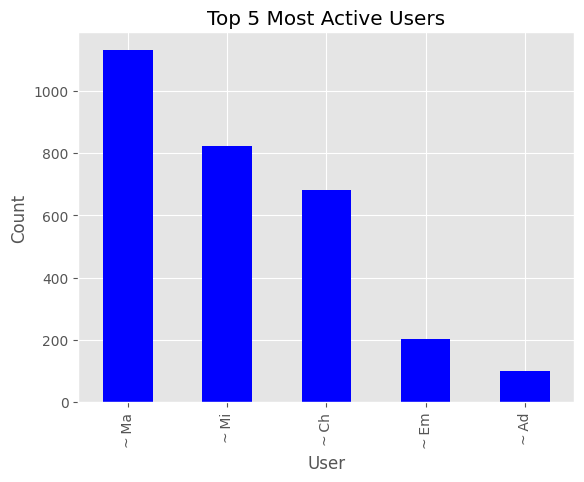

In [423]:
# Get the counts of each user
user_counts = df['User'].value_counts()

# Print the top 5 most active users
print(user_counts.head(5))

# Plot a bar graph of the top 5 most active users
user_counts.head(5).plot(kind='bar', color='blue')

plt.xlabel('User')
plt.ylabel('Count')
plt.title('Top 5 Most Active Users')
plt.show()

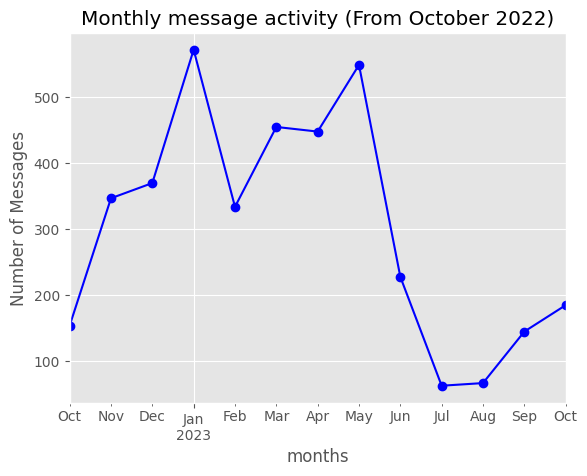

In [424]:
# Ensure that 'DateTime' is of datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter the DataFrame to only include data from October 2022 onwards
df_filtered = df[df['DateTime'] >= '2022-10-01']

# Resample the data on a monthly basis and count the number of messages
message_counts = df_filtered.set_index('DateTime').resample('M')['Message'].count()

# Plot a line chart
message_counts.plot(kind='line', color='blue', marker='o')

plt.xlabel('months')
plt.ylabel('Number of Messages')
plt.title('Monthly message activity (From October 2022)')
plt.show()

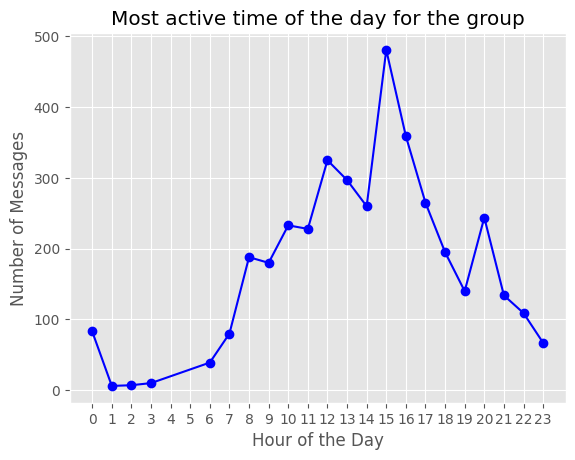

In [425]:
# Extract the hour from the 'DateTime' column
df['Hour'] = df['DateTime'].dt.hour

# Count the number of messages in each hour
hourly_counts = df['Hour'].value_counts().sort_index()

# Plot a line graph
hourly_counts.plot(kind='line', color='blue', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Most active time of the day for the group')

# Ensure each hour is shown on the x-axis
plt.xticks(range(24))

plt.grid(True)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


one: 201
Yeah: 160
think: 157
work: 151
know: 134
lol: 131
Thank: 129
now: 128
need: 122
though: 122


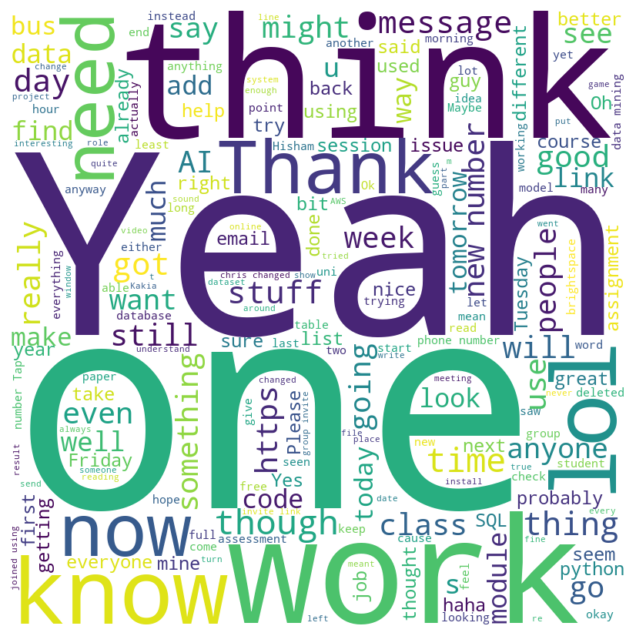

In [426]:
"""The wordcloud library would give an insight of the most used words in the User."""

import nltk
from nltk.corpus import stopwords
nltk.download(["stopwords","vader_lexicon","punkt"])
from wordcloud import WordCloud

# creating wordcloud
stop_words = set(stopwords.words('english'))

reviews = [word for word in df['Message'] if word not in stop_words]

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews))

# Get word frequencies
word_frequencies = wordcloud.process_text(' '.join(reviews))

# Print top 10 words
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
for word, frequency in top_words:
    print(f"{word}: {frequency}")

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The general word cloud doesn't give reasonable insights. Hence, I will select specific topics/word such as Lecturers names, course titles to see what the sentiments are around such instead. 

Sentiments review per Lecturer

In [427]:
# Create a new DataFrame that only contains the rows with the word 'adnane' in the 'Message' column, regardless of case
df_a = df[df['Message'].str.contains('adnane', case=False, na=False)]

# Select only the required columns
df_a = df_a[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]

df_a.head()

,User,Message,DateTime,vader_compound,vader_sentiment_category
234,Angi,Tomorrow’s AI class is online as Adnane is unw...,2022-11-10 14:45:29,0.0000,neutral
1145,Lero,Oh ok that's great then. I hope Adnane posts o...,2023-01-12 16:45:01,0.6529,positive
1199,~ Mi,"Once the dates are confirmed, I guess we just ...",2023-01-15 10:52:23,-0.3164,negative
1200,~ Mi,"On the subject of Adnane, has he been asked ab...",2023-01-15 10:54:27,0.0000,neutral
1210,Angi,Adnane might not be able to do anything about ...,2023-01-15 11:04:11,0.0000,neutral


In [428]:
# Create a new DataFrame that only contains the rows with the word 'hisham' or 'Hisham' in the 'Message' column
df_h = df[df['Message'].str.contains('hisham', case=False, na=False)]

# Select only the required columns
df_h = df_h[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]

df_h.head()

,User,Message,DateTime,vader_compound,vader_sentiment_category
1210,Angi,Adnane might not be able to do anything about ...,2023-01-15 11:04:11,0.0000,neutral
1216,Angi,Good thing Hisham is on board. Hopefully the t...,2023-01-15 11:10:45,0.8481,positive
1372,~ Ma,What about the thing Hisham was saying about A...,2023-01-19 16:07:38,0.0000,neutral
1388,~ Ch,"To that effect, Adnane should do what Hisham d...",2023-01-19 16:12:22,0.0000,neutral
1618,~ Ma,guess have to ask Hisham,2023-02-09 14:00:51,0.0000,neutral


In [429]:
# Create a new DataFrame that only contains the rows with the word 'kakia' or 'Kakia' in the 'Message' column
df_k = df[df['Message'].str.contains('kakia', case=False, na=False)]

# Select only the required columns
df_k = df_k[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]

df_k.head()

,User,Message,DateTime,vader_compound,vader_sentiment_category
1761,~ Ch,Having just come out my one to one meeting wit...,2023-02-27 14:41:18,0.4336,positive
1780,~ Mi,Emailed the person. Seems they're out of the o...,2023-02-27 15:39:58,0.4902,positive
1782,~ Ch,Nah because I didn't really have a clue what I...,2023-02-27 15:43:06,0.3182,positive
2056,Ifa,Hi everyone! Kakia is on!,2023-03-17 13:38:29,0.0000,neutral
2116,~ Em,Kakia is live,2023-03-24 13:36:34,0.0000,neutral


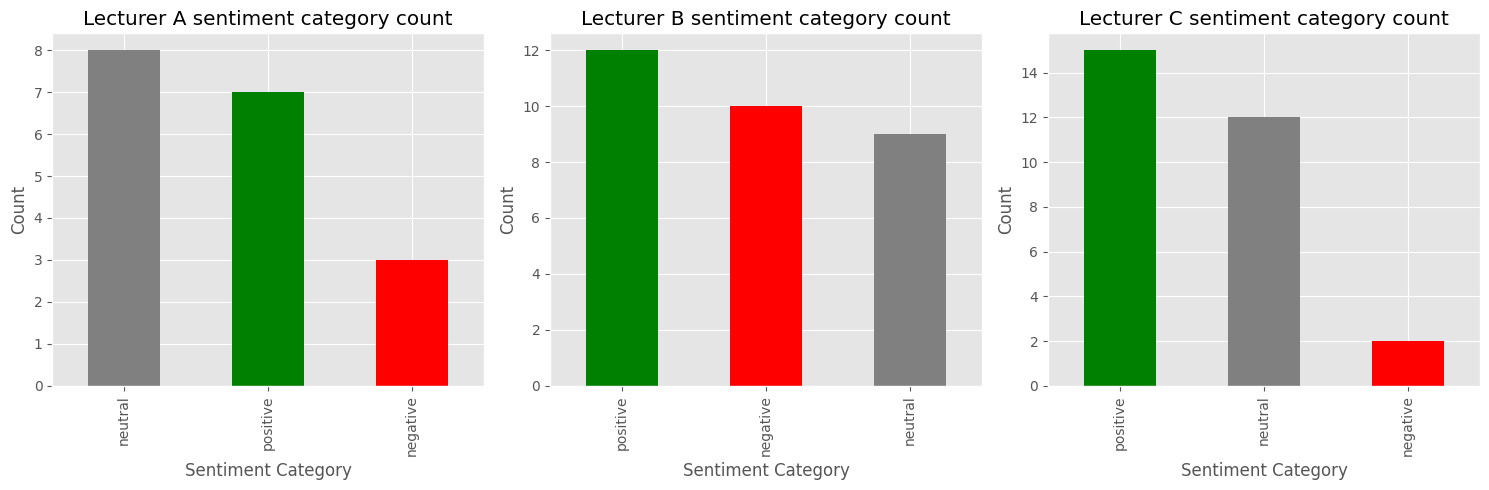

In [430]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Get the counts of each category for Adnane
category_counts_adnane = df_a['vader_sentiment_category'].value_counts()

# Plot a bar graph for Adnane
category_counts_adnane.plot(kind='bar', color=['grey', 'green', 'red'], ax=axs[0])
axs[0].set_xlabel('Sentiment Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Lecturer A sentiment category count')

# Get the counts of each category for Hisham
category_counts_hisham = df_h['vader_sentiment_category'].value_counts()

# Plot a bar graph for Hisham
category_counts_hisham.plot(kind='bar', color=['green', 'red', 'grey'], ax=axs[1])
axs[1].set_xlabel('Sentiment Category')
axs[1].set_ylabel('Count')
axs[1].set_title('Lecturer B sentiment category count')

# Get the counts of each category for Kakia
category_counts_kakia = df_k['vader_sentiment_category'].value_counts()

# Plot a bar graph for Kakia
category_counts_kakia.plot(kind='bar', color=['green', 'grey', 'red'], ax=axs[2])
axs[2].set_xlabel('Sentiment Category')
axs[2].set_ylabel('Count')
axs[2].set_title('Lecturer C sentiment category count')

plt.tight_layout()
plt.show()

In [431]:
# Get the number of rows in each DataFrame
num_rows_a = df_a.shape[0]
num_rows_h = df_h.shape[0]
num_rows_k = df_k.shape[0]

print(f'Lecturer A was mentioned {num_rows_a} times.')
print(f'Lecturer B mentioned {num_rows_h} times.')
print(f'Lecturer C mentioned {num_rows_k} times.')

Lecturer A was mentioned 18 times.
Lecturer B mentioned 31 times.
Lecturer C mentioned 29 times.


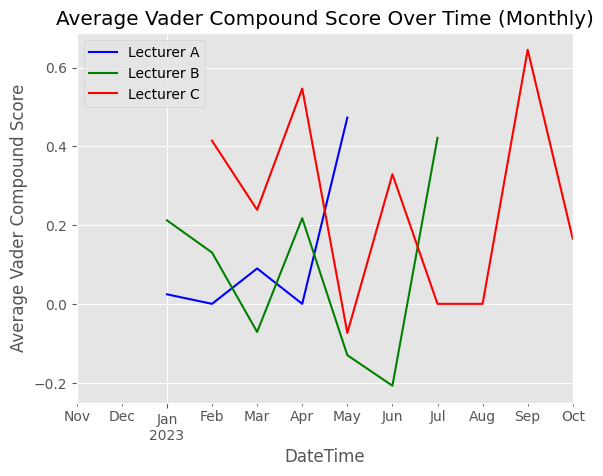

In [432]:
import matplotlib.pyplot as plt

# Ensure that 'DateTime' is of datetime type
df_a['DateTime'] = pd.to_datetime(df_a['DateTime'])
df_h['DateTime'] = pd.to_datetime(df_h['DateTime'])
df_k['DateTime'] = pd.to_datetime(df_k['DateTime'])

# Sample the data on a monthly basis and calculate the mean
df_a_monthly = df_a.set_index('DateTime').resample('M')['vader_compound'].mean()
df_h_monthly = df_h.set_index('DateTime').resample('M')['vader_compound'].mean()
df_k_monthly = df_k.set_index('DateTime').resample('M')['vader_compound'].mean()

# Plot a line graph for each DataFrame
df_a_monthly.plot(label='Lecturer A', color='blue')
df_h_monthly.plot(label='Lecturer B', color='green')
df_k_monthly.plot(label='Lecturer C', color='red')

plt.xlabel('DateTime')
plt.ylabel('Average Vader Compound Score')
plt.title('Average Vader Compound Score Over Time (Monthly)')
plt.legend()
plt.show()

In [433]:
# List of some modules undertaken in the MSc program to count
words = ['Python', 'sql', 'machine learning', 'deep learning', 'cloud computing']

# Initializing a dictionary to store the counts
word_counts = {}

# Loop through the list of words and count each one
for word in words:
    word_counts[word] = df['Message'].str.contains(word, case=False, na=False).sum()

# Print the counts
for word, count in word_counts.items():
    print(f'The word "{word}" was mentioned {count} times.')

The word "Python" was mentioned 42 times.
The word "sql" was mentioned 62 times.
The word "machine learning" was mentioned 5 times.
The word "deep learning" was mentioned 21 times.
The word "cloud computing" was mentioned 7 times.


From the word counts we see that sql, python and deep learning had the highest count. Although Machine learning and cloud computing are modules, but it wasn't discussed much on the group. Hence we will do a further sentiment analysis on the 3 most talked about modules. 

In [434]:
import re

# Define a function to find the module in the 'Message' column
def find_module(message):
    modules = ['python', 'sql', 'machine learning', 'deep learning', 'cloud computing']
    for module in modules:
        if re.search(module, message, re.IGNORECASE):
            return module
    return None

# Create a new DataFrame that only contains some modules undertaken' in the 'Message' column, regardless of case
df_courses = df[df['Message'].str.contains('python|sql|machine learning|deep learning|cloud computing', case=False, na=False)]

# Select only the 'vader_compound' and 'DateTime' columns
df_courses = df_courses[['Message','DateTime', 'vader_compound']]

# Create the 'module' column
df_courses['module'] = df_courses['Message'].apply(find_module)

df_courses.head()

,Message,DateTime,vader_compound,module
64,https://adediwura.hashnode.dev/creating-your-f...,2022-10-04 19:41:47,0.0000,sql
148,"Hi, if anyone is interested in python tutorial...",2022-10-24 07:16:01,0.4019,python
150,Because this python wan carry me go where I no...,2022-10-24 07:17:49,-0.2960,python
207,Did anyone else find d link to python class?,2022-11-08 13:24:36,0.0000,python
215,This is C. But don't let them stop you for you...,2022-11-09 09:23:16,0.6632,python


In [435]:
# Create new DataFrames that only contain the rows with the specified words in the 'Message' column
df_python = df[df['Message'].str.contains('Python', case=False, na=False)]
df_sql = df[df['Message'].str.contains('sql', case=False, na=False)]
df_deep_learning = df[df['Message'].str.contains('deep learning', case=False, na=False)]

# Select only the required columns
df_python = df_python[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]
df_sql = df_sql[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]
df_deep_learning = df_deep_learning[['User', 'Message', 'DateTime', 'vader_compound', 'vader_sentiment_category']]



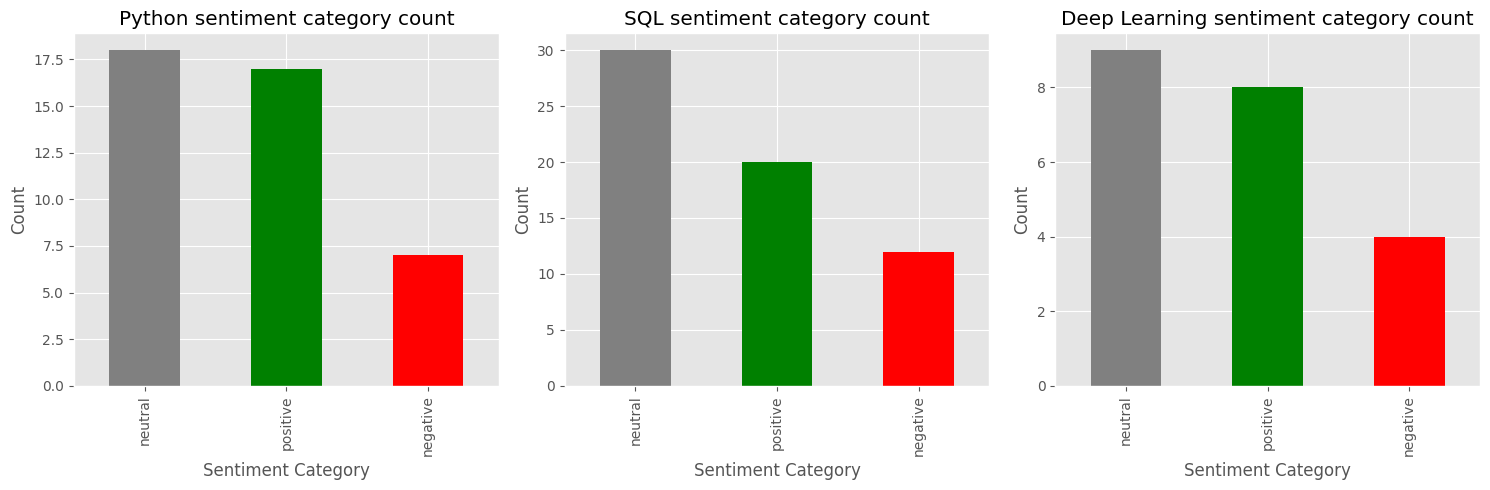

In [436]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a color mapping
color_dict = {'negative': 'red', 'neutral': 'grey', 'positive': 'green'}

# Get the counts of each category for Python
category_counts_python = df_python['vader_sentiment_category'].value_counts()

# Plot a bar graph for Python
category_counts_python.plot(kind='bar', ax=axs[0], color=category_counts_python.index.map(color_dict))
axs[0].set_xlabel('Sentiment Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Python sentiment category count')

# Get the counts of each category for SQL
category_counts_sql = df_sql['vader_sentiment_category'].value_counts()

# Plot a bar graph for SQL
category_counts_sql.plot(kind='bar', ax=axs[1], color=category_counts_sql.index.map(color_dict))
axs[1].set_xlabel('Sentiment Category')
axs[1].set_ylabel('Count')
axs[1].set_title('SQL sentiment category count')

# Get the counts of each category for Deep Learning
category_counts_deep_learning = df_deep_learning['vader_sentiment_category'].value_counts()

# Plot a bar graph for Deep Learning
category_counts_deep_learning.plot(kind='bar', ax=axs[2], color=category_counts_deep_learning.index.map(color_dict))
axs[2].set_xlabel('Sentiment Category')
axs[2].set_ylabel('Count')
axs[2].set_title('Deep Learning sentiment category count')

plt.tight_layout()
plt.show()

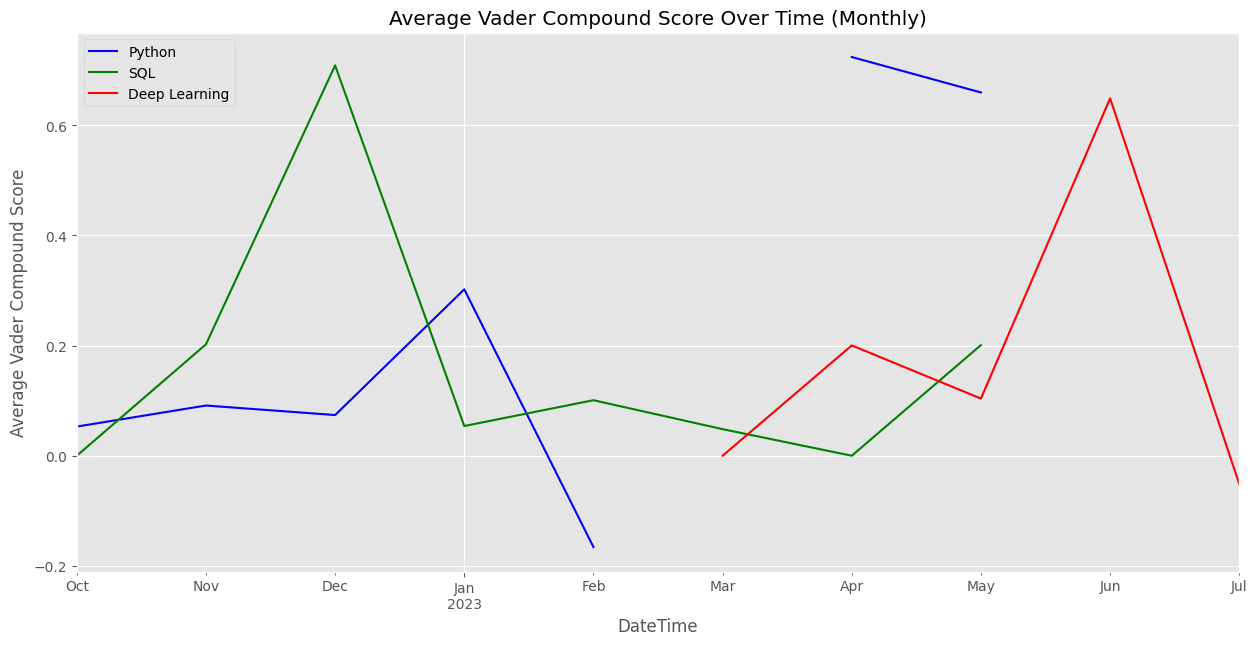

In [437]:
fig, ax = plt.subplots(figsize=(15, 7))

# Resample the data on a monthly basis and calculate the mean
df_python_monthly = df_python.set_index('DateTime').resample('M')['vader_compound'].mean()
df_sql_monthly = df_sql.set_index('DateTime').resample('M')['vader_compound'].mean()
df_deep_learning_monthly = df_deep_learning.set_index('DateTime').resample('M')['vader_compound'].mean()

# Plot a line graph for each DataFrame
df_python_monthly.plot(label='Python', color='blue', ax=ax)
df_sql_monthly.plot(label='SQL', color='green', ax=ax)
df_deep_learning_monthly.plot(label='Deep Learning', color='red', ax=ax)

plt.xlabel('DateTime')
plt.ylabel('Average Vader Compound Score')
plt.title('Average Vader Compound Score Over Time (Monthly)')
plt.legend()
plt.show()

# Export data to local drive for visualization

In [439]:
# # Store each DataFrame as a CSV file
# df.to_csv('df.csv', index=False)
# df_a.to_csv('df_a.csv', index=False)
# df_h.to_csv('df_h.csv', index=False)
# df_k.to_csv('df_k.csv', index=False)
# df_python.to_csv('df_python.csv', index=False)
# df_sql.to_csv('df_sql.csv', index=False)
# df_deep_learning.to_csv('df_deep_learning.csv', index=False)
# df_lecturers.to_csv('df_lecturers.csv', index=False)
# df_courses.to_csv('df_courses.csv', index=False)